In [4]:
import imageio.v2 as imageio
import numpy as np 
import matplotlib.pyplot as plt

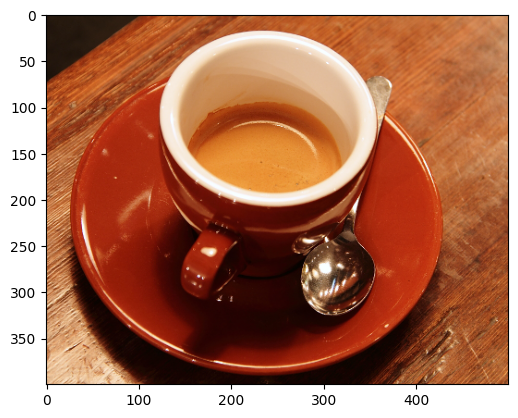

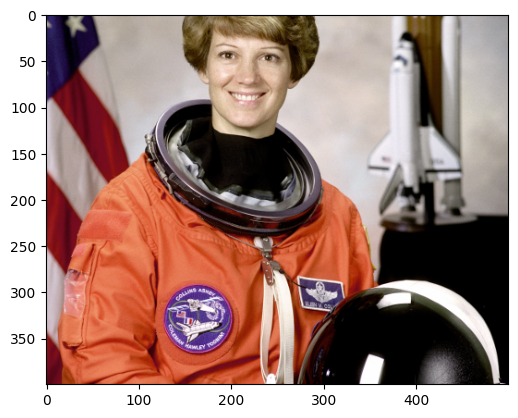

In [5]:
im1 = imageio.imread('imageio:coffee.png')[:,50:550,:]/255.

plt.imshow(im1)
plt.show()

im2=imageio.imread('imageio:astronaut.png')[56:456,6:506,:]/255.

plt.imshow(im2)
plt.show()

In [2]:
def RGB_to_YIQ(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:, :, 0] = 0.229 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2]
    yiq[:, :, 1] = 0.595716 * rgb[:, :, 0] - 0.274453 * rgb[:, :, 1] - 0.321263 * rgb[:, :, 2]
    yiq[:, :, 2] = 0.211456 * rgb[:, :, 0] - 0.522591 * rgb[:, :, 1] + 0.311135 * rgb[:, :, 2]
    return yiq

In [3]:
def YIQ_to_RGB(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:, :, 0] = yiq[:, :, 0] + 0.9663 * yiq[:, :, 1] + 0.6210 * yiq[:, :, 2]
    rgb[:, :, 1] = yiq[:, :, 0] - 0.2721 * yiq[:, :, 1] - 0.6474 * yiq[:, :, 2]
    rgb[:, :, 2] = yiq[:, :, 0] - 1.1070 * yiq[:, :, 1] + 1.7046 * yiq[:, :, 2]
    return rgb

In [42]:
#SUMA CLAMPEADA
#YC := YA + YB; If YC > 1 then YC:=1;
def suma_clampeada(A , B):
    
    s_clam = np.zeros(A[:, :, 0].shape)
    
    s_clam = A[:, :, 0] + B[:, :, 0]
    
    #If YC > 1 then YC:=1
    print('Salida previa:',s_clam) 
    s_clam[s_clam > 1] = 1
    print('Salida modificada: ',s_clam)
    return s_clam

In [43]:
#PRUEBA DE SUMA CLAMPEADA
suma_clampeada(im1,im2)  #funciona correctamente

Salida previa: [[0.6745098  0.49411765 0.36470588 ... 1.38431373 1.4        1.40784314]
 [0.59215686 0.38431373 0.31372549 ... 1.38823529 1.4        1.39215686]
 [0.50196078 0.31764706 0.32156863 ... 1.39215686 1.4        1.39215686]
 ...
 [1.24313725 1.22352941 1.20784314 ... 0.51372549 0.53333333 0.65490196]
 [1.23137255 1.20784314 1.20784314 ... 0.52941176 0.61568627 0.69019608]
 [1.25882353 1.21176471 1.25490196 ... 0.69803922 0.6627451  0.78039216]]
Salida modificada:  [[0.6745098  0.49411765 0.36470588 ... 1.         1.         1.        ]
 [0.59215686 0.38431373 0.31372549 ... 1.         1.         1.        ]
 [0.50196078 0.31764706 0.32156863 ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.51372549 0.53333333 0.65490196]
 [1.         1.         1.         ... 0.52941176 0.61568627 0.69019608]
 [1.         1.         1.         ... 0.69803922 0.6627451  0.78039216]]


array([[0.6745098 , 0.49411765, 0.36470588, ..., 1.        , 1.        ,
        1.        ],
       [0.59215686, 0.38431373, 0.31372549, ..., 1.        , 1.        ,
        1.        ],
       [0.50196078, 0.31764706, 0.32156863, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.51372549, 0.53333333,
        0.65490196],
       [1.        , 1.        , 1.        , ..., 0.52941176, 0.61568627,
        0.69019608],
       [1.        , 1.        , 1.        , ..., 0.69803922, 0.6627451 ,
        0.78039216]])

In [48]:
#RESTA CLAMPEADA
#YC := YA - YB; If YC > 1 then YC:=1;
def resta_clampeada(A , B):
    
    r_clam = np.zeros(A[:, :, 0].shape)
    
    r_clam = A[:, :, 0] - B[:, :, 0]
    
    #If YC < 0 then YC:=0
    print('Luminansia previa:',r_clam) 
    r_clam[r_clam < 0] = 0
    print('Luminansia modificada: ',r_clam)
    return r_clam

In [49]:
#PRUEBA DE RESTA CLAMPEADA
resta_clampeada(yiq1,yiq2) #funciona correctamente

Luminansia previa: [[-0.37102353 -0.20260392 -0.09252549 ...  0.02424706  0.03063922
   0.05252157]
 [-0.29986667 -0.11448627 -0.05138039 ...  0.03332549  0.02289804
   0.04477255]
 [-0.21527843 -0.06834118 -0.05547843 ...  0.00280392 -0.00083922
   0.03063137]
 ...
 [ 0.53671765  0.56903529  0.58451765 ...  0.29033725  0.30121961
   0.39970588]
 [ 0.54759216  0.55893333  0.56532549 ...  0.30908235  0.37646667
   0.39723922]
 [ 0.55815294  0.55983137  0.6291098  ...  0.23107059  0.38398039
   0.46290588]]
Luminansia modificada:  [[0.         0.         0.         ... 0.02424706 0.03063922 0.05252157]
 [0.         0.         0.         ... 0.03332549 0.02289804 0.04477255]
 [0.         0.         0.         ... 0.00280392 0.         0.03063137]
 ...
 [0.53671765 0.56903529 0.58451765 ... 0.29033725 0.30121961 0.39970588]
 [0.54759216 0.55893333 0.56532549 ... 0.30908235 0.37646667 0.39723922]
 [0.55815294 0.55983137 0.6291098  ... 0.23107059 0.38398039 0.46290588]]


array([[0.        , 0.        , 0.        , ..., 0.02424706, 0.03063922,
        0.05252157],
       [0.        , 0.        , 0.        , ..., 0.03332549, 0.02289804,
        0.04477255],
       [0.        , 0.        , 0.        , ..., 0.00280392, 0.        ,
        0.03063137],
       ...,
       [0.53671765, 0.56903529, 0.58451765, ..., 0.29033725, 0.30121961,
        0.39970588],
       [0.54759216, 0.55893333, 0.56532549, ..., 0.30908235, 0.37646667,
        0.39723922],
       [0.55815294, 0.55983137, 0.6291098 , ..., 0.23107059, 0.38398039,
        0.46290588]])

In [51]:
#SUMA PROMEDIADA
#YC := (YA + YB) / 2;

def suma_promediada(A , B):
    
    s_prom = np.zeros(A[:, :, 0].shape)
    
    s_prom = (A[:, :, 0] + B[:, :, 0]) / 2
    
    return  s_prom

In [53]:
#RESTA PROMEDIADA
#YC := (YA - YB) / 2;

def resta_promediada(A , B):
    
    r_prom = np.zeros(A[:, :, 0].shape)
    
    r_prom = (A[:, :, 0] - B[:, :, 0]) / 2
    
    return r_prom

In [ ]:
def interpolacion(yiqA,yiqB):
    yiqC = np.zeros(yiqA.shape)
    
    #IC := (YA * IA + YB * IB) / (YA + YB) ;
    yiqC[:, :, 1] = (yiqA[:, :, 0] * yiqA[:, :, 1] + yiqB[:, :, 0] * yiqB[:, :, 1])/(yiqA[:, :, 0]+yiqB[:, :, 0])
    
    #QC := (YA * QA + YB * QB) / (YA + YB) ; 
    yiqC[:, :, 2] = (yiqA[:, :, 0] * yiqA[:, :, 2] + yiqB[:, :, 0] * yiqB[:, :, 2])/(yiqA[:, :, 0]+yiqB[:, :, 0])
    
    return yiqC

In [ ]:
def if_ligther(yiqA, yiqB):
    '''if YA > YB then {YC := YA; IC := IA; QC := QA}
    else {YC := YB; IC := IB; QC := QB};'''
    
    
      mask = YA > YB
    YC[mask] = YA[mask]
    IC[mask] = image_A[mask, :, 1]
    QC[mask] = image_A[mask, :, 2]  
    

In [6]:
yiq1=RGB_to_YIQ(im1)
yiq2=RGB_to_YIQ(im2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


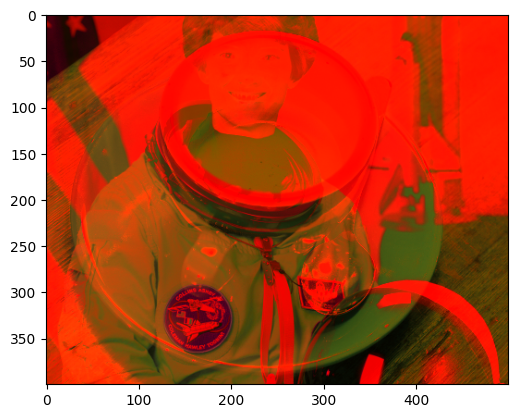

In [19]:
#
yiq3 = np.zeros(yiq1.shape)

#CUASI-SUMAS EN LUMINANCIAS
#yiq3[:, :, 0] = yiq1[:,:,0]+yiq2[:,:,0]
YC = suma_clampeada(yiq1,yiq2)

#SUMA CLAMPEADA

#SUMA PROMEDIADA
IC = (yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]*yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
QC = (yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]*yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])

#plt.figure(0)
#plt.imshow(YC)
#plt.figure(1)
#plt.imshow(IC)
#plt.figure(2)
#plt.imshow(QC)

yiq3[:,:,0] = YC
yiq3[:,:,1] = IC
yiq3[:,:,2] = QC
plt.imshow(yiq3)